In [ ]:
import pandas as pd

data = pd.read_csv("Iris.csv")
print(data.shape)
data[::10]



(150, 5)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
20,5.4,3.4,1.7,0.2,0
30,4.8,3.1,1.6,0.2,0
40,5.0,3.5,1.3,0.3,0
50,7.0,3.2,4.7,1.4,1
60,5.0,2.0,3.5,1.0,1
70,5.9,3.2,4.8,1.8,1
80,5.5,2.4,3.8,1.1,1
90,5.5,2.6,4.4,1.2,1


In [ ]:
import math

def softmax(data):
    exp_data = [math.exp(x) for x in data]
    sum_exp_data = sum(exp_data)
    result = [x/sum_exp_data for x in exp_data]
    return result

# 1. Visualize hàm SoftMax

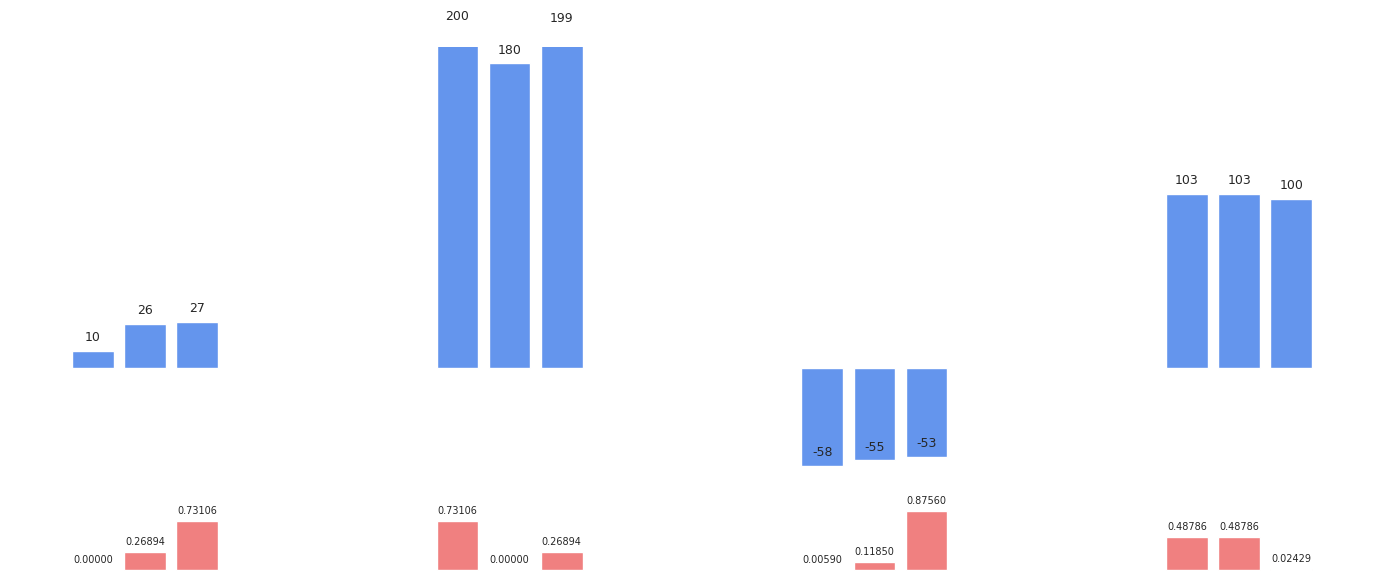

In [ ]:
import math
import matplotlib.pyplot as plt


def softmax(data):
    exps = [math.exp(x) for x in data]
    total = sum(exps)
    return [x / total for x in exps]

# đầu vào softMax
zs = [
    [10, 26, 27],
    [200, 180, 199],
    [-58, -55, -53],
    [103, 103, 100]
]


z_labels = ['z₁', 'z₂', 'z₃']
a_labels = ['a₁', 'a₂', 'a₃']


fig, ax = plt.subplots(figsize=(14, 6))

# Thông số plot
bar_width = 0.4
offset = 0.5
group_spacing = 3.5
scale_z = 0.05
scale_a = 2

for group_idx, z in enumerate(zs):
    a = softmax(z)

    x_base = group_idx * group_spacing
    x_pos = [x_base + i * offset for i in range(len(z))]

    for i, val in enumerate(z):
        scaled_val = val * scale_z
        ax.bar(x_pos[i], scaled_val, color='cornflowerblue', width=bar_width, bottom=3)
        ax.text(x_pos[i], scaled_val +3 + 0.2, f'{val}', ha='center', va='bottom', fontsize=9)


    for i, val in enumerate(a):
        scaled_a = val * scale_a
        ax.bar(x_pos[i], scaled_a, color='lightcoral', width=bar_width, bottom=-3)
        ax.text(x_pos[i], scaled_a - 3 + 0.15, f'{val:.5f}', ha='center', va='bottom', fontsize=7)


ax.set_ylim(-3.2, max(max(z)*scale_z for z in zs) + 2.5)
ax.axis('off')
plt.tight_layout()
plt.show()


# 1. (Mở rộng) Robust/stable SoftMax

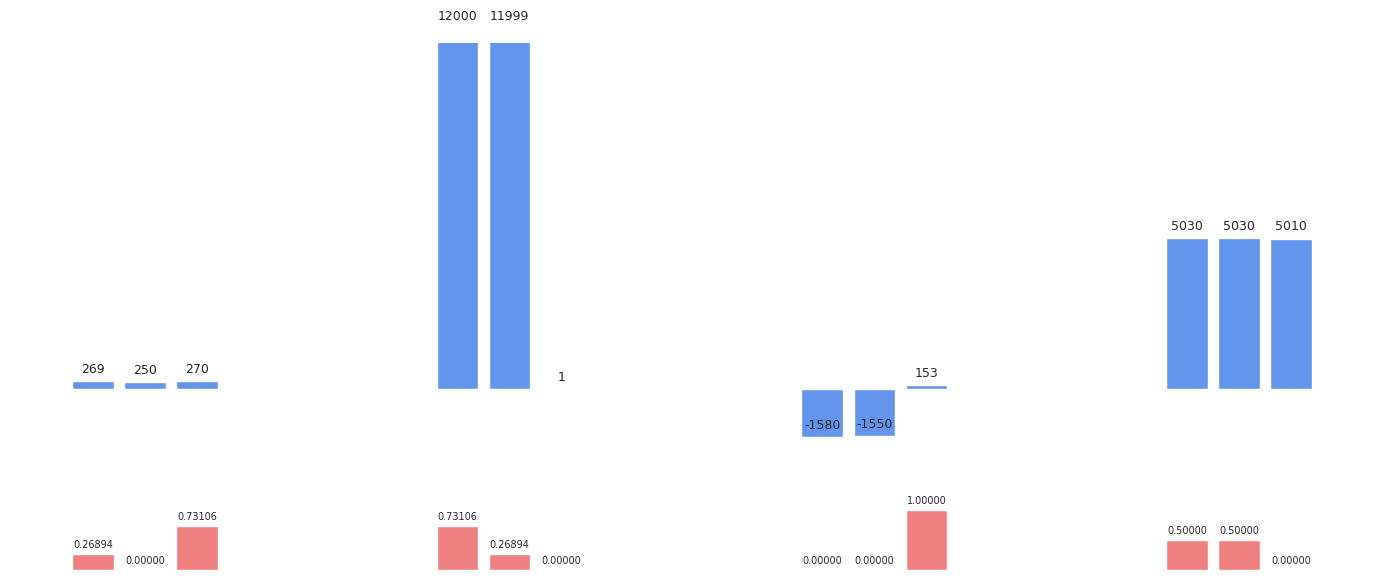

In [ ]:
import math
import matplotlib.pyplot as plt

def robust_softmax(data):
    max_value = max(data)
    data = [x-max_value for x in data]

    exp_data = [math.exp(x) for x in data]
    sum_exp_data = sum(exp_data)
    result = [x/sum_exp_data for x in exp_data]

    return result


zs = [
    [269, 250, 270],
    [12000, 11999, 1],
    [-1580, -1550, 153],
    [5030, 5030, 5010]
]


z_labels = ['z₁', 'z₂', 'z₃']
a_labels = ['a₁', 'a₂', 'a₃']


fig, ax = plt.subplots(figsize=(14, 6))

# Thông số plot
bar_width = 0.4
offset = 0.5
group_spacing = 3.5
scale_z = 0.001
scale_a = 2

for group_idx, z in enumerate(zs):
    a = robust_softmax(z)

    x_base = group_idx * group_spacing
    x_pos = [x_base + i * offset for i in range(len(z))]

    for i, val in enumerate(z):
        scaled_val = val * scale_z
        ax.bar(x_pos[i], scaled_val, color='cornflowerblue', width=bar_width, bottom=3)
        ax.text(x_pos[i], scaled_val +3 + 0.2, f'{val}', ha='center', va='bottom', fontsize=9)

    for i, val in enumerate(a):
        scaled_a = val * scale_a
        ax.bar(x_pos[i], scaled_a, color='lightcoral', width=bar_width, bottom=-3)
        ax.text(x_pos[i], scaled_a - 3 + 0.15, f'{val:.5f}', ha='center', va='bottom', fontsize=7)

ax.set_ylim(-3.2, max(max(z)*scale_z for z in zs) + 2.5)
ax.axis('off')
plt.tight_layout()
plt.show()


# 2. Train SoftMax (mini-batch 25)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv("Iris.csv")
data = data.to_numpy()
X = data[:,:4]
Y = data[:,4]


N = 150
X = np.hstack([X, np.ones((N, 1))])
d = int(X.shape[1])
k = np.unique(Y).shape[0]

# one_hot
def convert_one_hot(y, k):
    one_hot = np.zeros((len(y), k))
    y = y.astype(int)
    one_hot[np.arange(len(y)), y] = 1
    return one_hot


theta = 0.01 * np.random.randn(d, k)
print('theta:\n', theta)


learning_rate = 0.01
losses = []
accs = []
epoch = 3000
m = 25


def predict(xi, theta):
    z = xi.dot(theta)
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    y_hat = exp_z / np.sum(exp_z, axis=1, keepdims=True)
    return np.argmax(y_hat, axis=1)


for _ in range(epoch):
    shuffled_indices = np.random.permutation(N)
    X_b_shuffled     = X[shuffled_indices]
    y_shuffled       = Y[shuffled_indices]

    for i in range(0, N, m):
        xi = X_b_shuffled[i:i + m]
        yi = y_shuffled[i:i + m].reshape(-1,1)
        yi_one_hot = convert_one_hot(yi.flatten(), k)
        z = xi.dot(theta)

        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        y_hat = exp_z / np.sum(exp_z, axis=1, keepdims=True)


        loss = -np.sum(yi_one_hot * np.log(y_hat + 1e-10), axis=1)
        losses.append(np.mean(loss))


        gradient = xi.T.dot((y_hat - yi_one_hot)) / yi_one_hot.shape[0]
        theta -= learning_rate * gradient


        preds = predict(xi, theta)
        acc = (preds == yi.flatten().astype(int)).mean()
        accs.append(acc)

theta:
 [[-0.01275456 -0.00828125 -0.01454646]
 [-0.00985379  0.0012516   0.00816154]
 [ 0.01542148 -0.00335337 -0.01216117]
 [-0.01507778 -0.00454399 -0.00063057]
 [ 0.00691171  0.01412985 -0.00868228]]


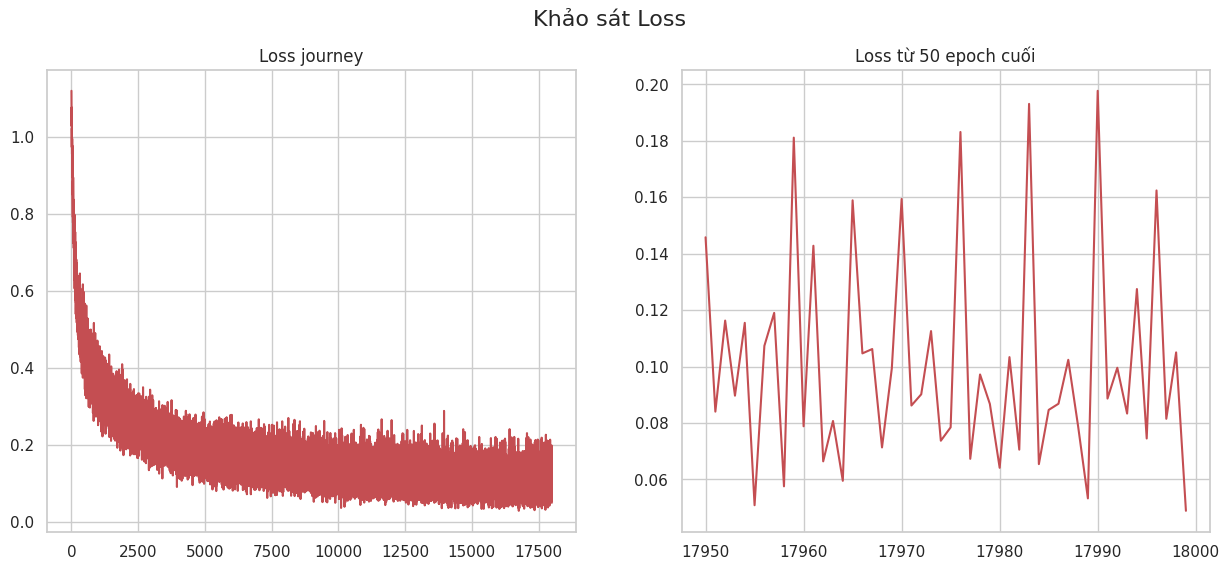

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle("Khảo sát Loss", fontsize=16)
journey = epoch * N //m
x_axis1 = list(range(journey))
axes[0].plot(x_axis1, losses, color="r")
axes[0].set_title("Loss journey")

x_axis1 = list(range(journey-50,journey))
axes[1].plot(x_axis1, losses[-50:], color="r")
axes[1].set_title("Loss từ 50 epoch cuối")


plt.show()

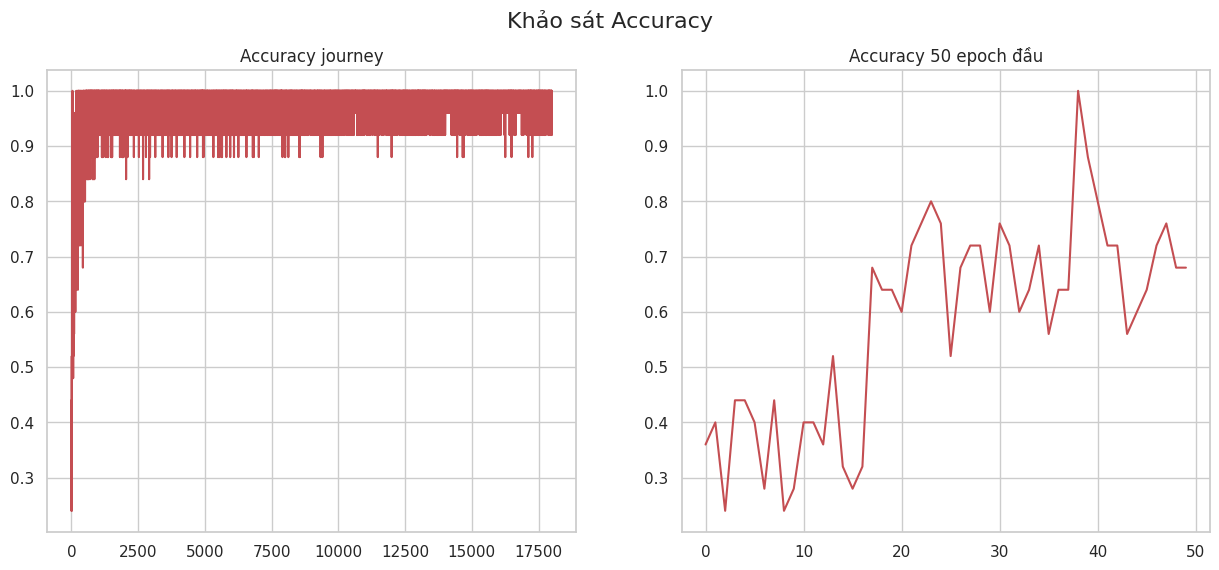

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle("Khảo sát Accuracy", fontsize=16)

x_axis1 = list(range(epoch * N //m))
axes[0].plot(x_axis1, accs, color="r")
axes[0].set_title("Accuracy journey")

x_axis1 = list(range(50))
axes[1].plot(x_axis1, accs[:50], color="r")
axes[1].set_title("Accuracy 50 epoch đầu")


plt.show()